<a href="https://colab.research.google.com/github/Katkins178/KendallA_DTSC4050_Fall2025/blob/main/KA_0955_Week_08_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 08 - Assignment

Kendall Atkins

## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link


**Assignment Instructions by Section:**

1.  **Data Exploration and Correlation (20%):**
    * **Task:**
        * Load the dataset and perform initial data exploration (e.g., describe, info).
        * Identify numerical features and calculate the correlation matrix.
        * Visualize the correlation matrix using a heatmap.
        * Identify highly correlated features and discuss potential multicollinearity issues.
    * **Learning Objectives:**
        * Understand correlation and its implications.
        * Use Python libraries (e.g., pandas, seaborn) for data exploration and visualization.

2.  **Derived Variables (20%):**
    * **Task:**
        * Based on domain knowledge or observed patterns, create at least two meaningful derived variables.
        * Explain the rationale behind creating each derived variable.
        * Analyze the impact of the derived variables on the correlation matrix.
        * Discuss if any of the derived variables help to reduce multicollinearity.
    * **Learning Objectives:**
        * Apply domain knowledge to create useful features.
        * Understand how derived variables can impact data relationships.
        * Understand how derived variables can impact multicollinearity.

3.  **Missing Value Imputation (15%):**
    * **Task:**
        * Identify features with missing values.
        * Choose appropriate imputation methods for each feature (e.g., mean, median, mode, KNN imputation).
        * Justify the choice of imputation method for each feature.
        * Evaluate the impact of imputation on the data distribution.
    * **Learning Objectives:**
        * Handle missing data effectively.
        * Apply different imputation techniques.
        * Understand the impact of imputation on data.

4.  **Categorical Encoding (15%):**
    * **Task:**
        * Identify categorical features (nominal and ordinal).
        * Apply appropriate encoding techniques (e.g., one-hot encoding, ordinal encoding, frequency encoding).
        * Explain the rationale for choosing each encoding method.
        * Discuss the potential impact of encoding on model performance.
    * **Learning Objectives:**
        * Encode categorical features appropriately.
        * Understand the differences between encoding methods.
        * Understand the impact of high cardinality.

5.  **Outlier Handling (15%):**
    * **Task:**
        * Identify potential outliers in numerical features using visualization or statistical methods (e.g., box plots, Z-scores).
        * Choose and apply appropriate outlier handling techniques (e.g., removal, capping, transformation).
        * Justify the chosen methods and discuss their impact.
    * **Learning Objectives:**
        * Detect and handle outliers.
        * Understand the impact of outliers on data.

6.  **Feature Scaling (15%):**
    * **Task:**
        * Apply appropriate scaling techniques to numerical features (e.g., standardization, min-max scaling).
        * Explain the rationale for choosing each scaling method.
        * Discuss the importance of scaling for different machine learning algorithms.
    * **Learning Objectives:**
        * Scale numerical features effectively.
        * Understand the differences between scaling methods.
        * Understand when scaling is necessary.


In [2]:
# set seed
import time
import numpy as np
import random

def generate_user_seed():
    # Get current time in nanoseconds (more granular)
    nanoseconds = time.time_ns()

    # Add a small random component to further reduce collision chances
    random_component = random.randint(0, 1000)  # Adjust range as needed

    # Combine them (XOR is a good way to mix values)
    seed = nanoseconds ^ random_component

    # Ensure the seed is within the valid range for numpy's seed
    seed = seed % (2**32)  # Modulo to keep it within 32-bit range

    return seed

user_seed = generate_user_seed()
print(user_seed)
np.random.seed(user_seed)

2554408488


In [3]:
import pandas as pd
import numpy as np
# from sklearn.datasets import make_regression, make_classification

# Number of samples
n_samples = 1000

# Numerical Features
numerical_data = {
    'squirrel_sightings': np.random.normal(0, 1, n_samples),
    'cat_nap_tilt': np.random.exponential(1, n_samples),
    'cat_meow': np.random.normal(0, 1, n_samples),
    'minutes_to_eat': None,
    'turtle_blinks': np.random.normal(0, 1, n_samples),
    'cat_disposition': np.random.normal(0, 1, n_samples)
}

#generate correlated data.
correlated_data = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], n_samples)
numerical_data['cat_meow'] = correlated_data[:,0]
numerical_data['minutes_to_eat'] = correlated_data[:,1]

#add outliers
numerical_data['turtle_blinks'][np.random.choice(n_samples, 20)] += 5

#add missing values
missing_indices = np.random.choice(n_samples, 100)
numerical_data['cat_disposition'][missing_indices] = np.nan

# Categorical Features
categorical_data = {
    'cat_personality': np.random.choice(['Annoying', 'Sweet', 'Wise', 'Playful'], n_samples),
    'meow_volume': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.2,0.5,0.3]),
    'mystery_stain_colors': np.random.choice(['Red','Blue','Yellow', None], n_samples)
}

# Create DataFrame
df_numerical = pd.DataFrame(numerical_data)
df_categorical = pd.DataFrame(categorical_data)
df = pd.concat([df_numerical, df_categorical], axis=1)

df['happiness'] = df['squirrel_sightings'] + 0.5 * df['cat_meow'] + np.random.normal(0, 0.5, n_samples)

# Save to CSV
df.to_csv('assignment_8.csv', index=False)

In [5]:
import pandas as pd

df = pd.read_csv('assignment_8.csv')
df.head()

,squirrel_sightings,cat_nap_tilt,cat_meow,minutes_to_eat,turtle_blinks,cat_disposition,cat_personality,meow_volume,mystery_stain_colors,happiness
0,-0.090858,1.925662,-0.863376,0.431195,-1.807039,-0.854389,Wise,Medium,NaN,-0.671781
1,0.152921,0.859469,0.786273,0.516280,-0.783834,0.883533,Sweet,High,Blue,0.059216
2,-0.043024,2.230347,-0.056112,0.044410,-0.057778,NaN,Annoying,Low,Red,0.396943
3,-1.379499,0.340626,0.812607,0.832645,-0.439265,1.427204,Annoying,Low,Yellow,-0.141656
4,-1.009589,0.230019,-0.698422,-0.313699,0.138373,-0.510792,Playful,Medium,Blue,-1.223577


1.  **Data Exploration and Correlation (20%):**
    * **Task:**
        * Perform initial data exploration (e.g., shape, info, describe).
        * Identify numerical features and calculate the correlation matrix.
        * Visualize the correlation matrix using a heatmap (caution).
        * Identify highly correlated features and discuss potential multicollinearity issues.
        * Document what you are doing (using comments is ok).
    * **Learning Objectives:**
        * Understand correlation and its implications.
        * Use Python libraries (e.g., pandas, seaborn) for data exploration and visualization.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   squirrel_sightings    1000 non-null   float64
 1   cat_nap_tilt          1000 non-null   float64
 2   cat_meow              1000 non-null   float64
 3   minutes_to_eat        1000 non-null   float64
 4   turtle_blinks         1000 non-null   float64
 5   cat_disposition       906 non-null    float64
 6   cat_personality       1000 non-null   object 
 7   meow_volume           1000 non-null   object 
 8   mystery_stain_colors  770 non-null    object 
 9   happiness             1000 non-null   float64
dtypes: float64(7), object(3)
memory usage: 78.3+ KB


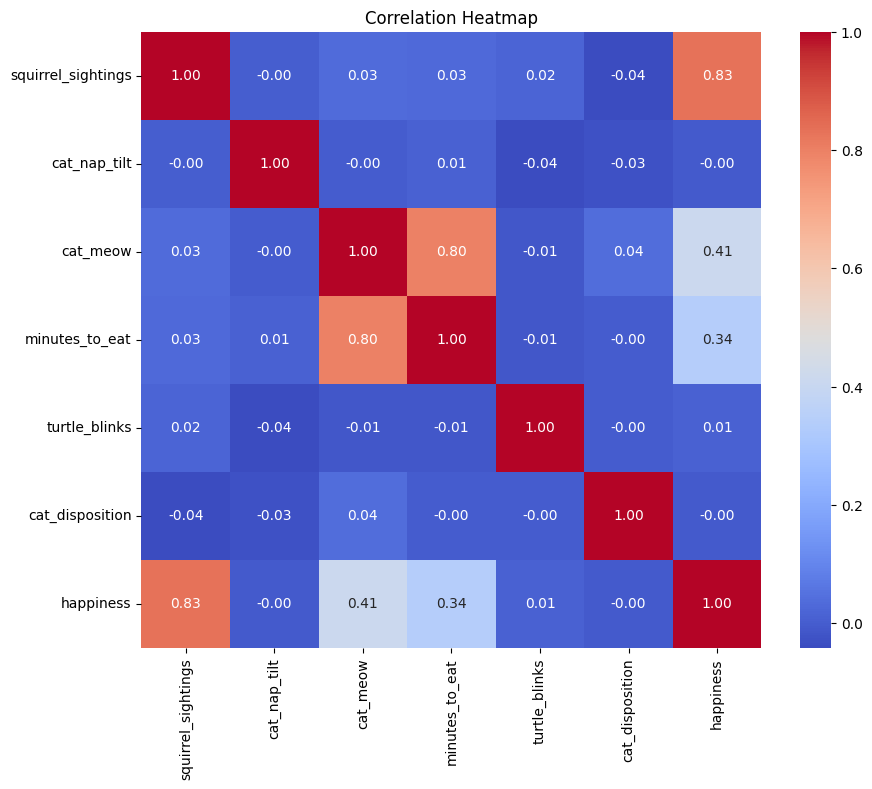

Strongly correlated features (absolute correlation > 0.7):
squirrel_sightings and happiness: 0.83
cat_meow and minutes_to_eat: 0.80


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initial Data Exploration
df.shape # num rows and cols
df.info() # data types in each col
df.describe() # Summary statistics

# Create correlation matrix
numerical_cols = df.select_dtypes(include=['float64']).columns # The only numerical data is float64
corr_matrix = df[numerical_cols].corr() #correlation matrix for numeric features

# Create visual
plt.figure(figsize=(10,8)) # Set Size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm") # Display numerical values on map with 2 decimal places
plt.title("Correlation Heatmap")
plt.show()

# Find Strong Correlations - Simple Way
print("Strongly correlated features (absolute correlation > 0.7):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # Only check each pair once
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.2f}")


2.  **Derived Variables (20%):**
    * **Task:**
        * Based on domain knowledge or observed patterns, create at least two meaningful derived variables.
        * Explain the rationale behind creating each derived variable.
        * Analyze the impact of the derived variables on the correlation matrix.
        * Discuss if any of the derived variables help to reduce multicollinearity.
    * **Learning Objectives:**
        * Apply domain knowledge to create useful features.
        * Understand how derived variables can impact data relationships.
        * Understand how derived variables can impact multicollinearity.

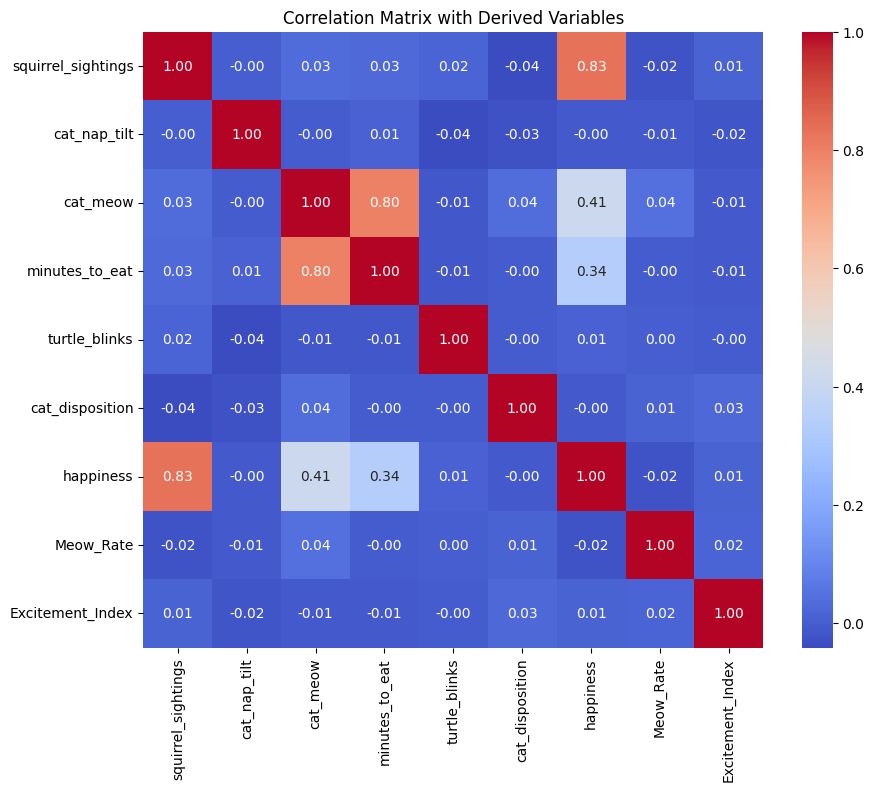

In [26]:
# These are the two strongest correlations
df['Meow_Rate'] = df['cat_meow'] / df['minutes_to_eat'] # Shows cat sounds per minute
df ['Excitement_Index'] = df['squirrel_sightings'] * df ['cat_disposition'] # Shows how cats mood interacts with the number of squirrels
corr_new = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_new, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix with Derived Variables")
plt.show()

3.  **Missing Value Imputation (15%):**
    * **Task:**
        * Identify features with missing values.
        * Choose appropriate imputation methods for each feature (e.g., mean, median, mode, KNN imputation).
        * Justify the choice of imputation method for each feature.
        * Evaluate the impact of imputation on the data distribution.
    * **Learning Objectives:**
        * Handle missing data effectively.
        * Apply different imputation techniques.
        * Understand the impact of imputation on data.

squirrel_sightings        0
cat_nap_tilt              0
cat_meow                  0
minutes_to_eat            0
turtle_blinks             0
cat_disposition           0
cat_personality           0
meow_volume               0
mystery_stain_colors    230
happiness                 0
Meow_Rate                 0
Excitement_Index          0
dtype: int64


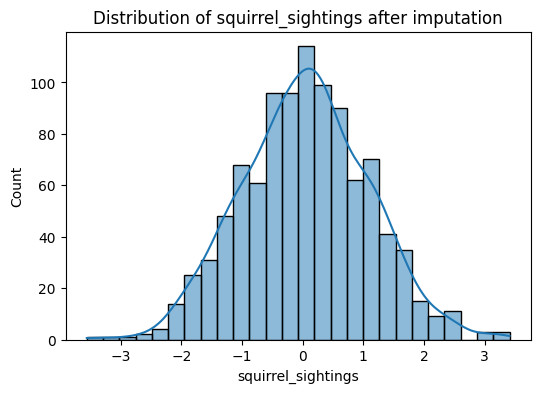

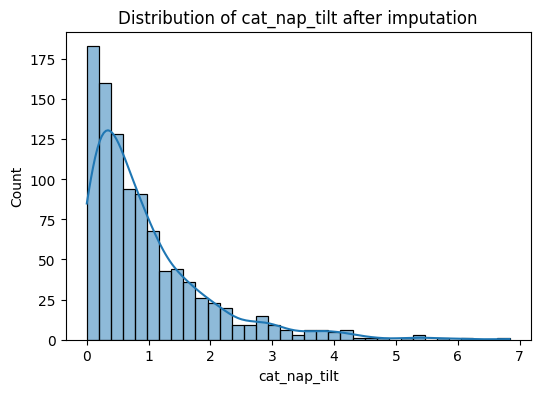

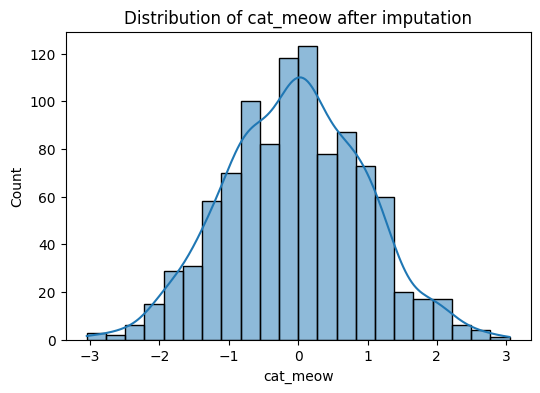

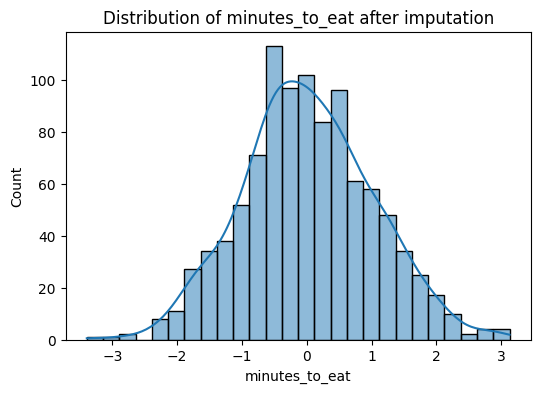

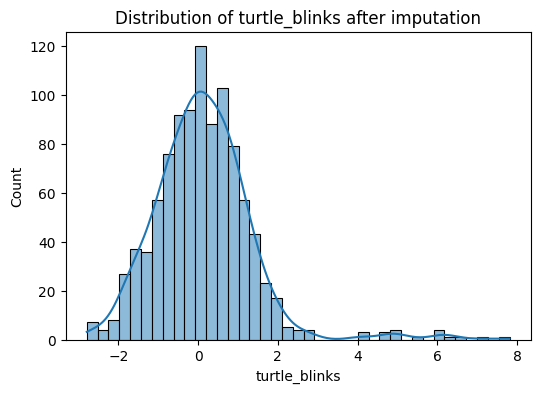

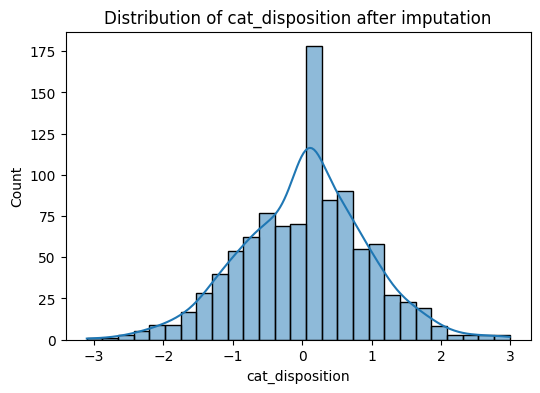

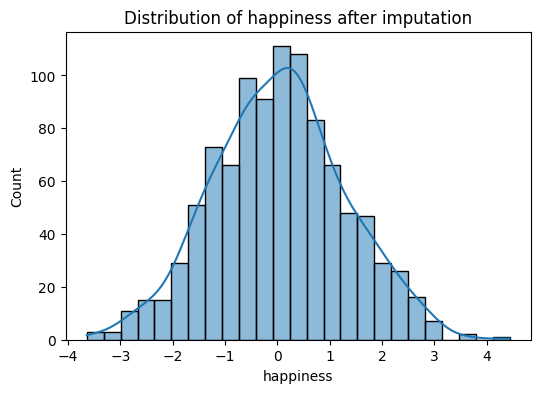

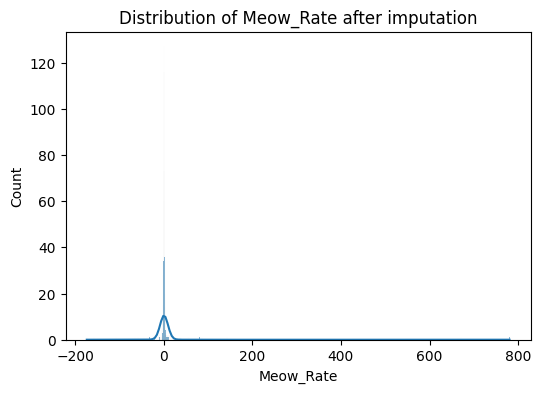

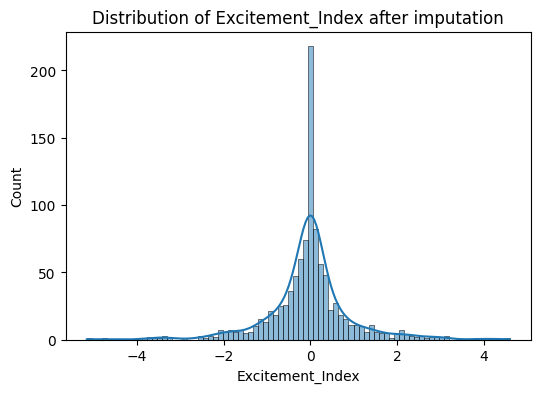

In [30]:
# Count missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)
# Identify numerical columns for imputation, excluding those already processed or non-numeric types
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} after imputation")
    plt.show()

4.  **Categorical Encoding (15%):**
    * **Task:**
        * Identify categorical features (nominal and ordinal).
        * Apply appropriate encoding techniques (e.g., one-hot encoding, ordinal encoding).
        * Explain the rationale for choosing each encoding method.
        * Discuss the potential impact of encoding on model performance.
    * **Learning Objectives:**
        * Encode categorical features appropriately.
        * Understand the differences between encoding methods.
        * Understand the impact of high cardinality.

In [34]:
from sklearn.preprocessing import OrdinalEncoder
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)
meow_order = ['Low', 'Medium', 'High']
ordinal_encoder = OrdinalEncoder(categories=[meow_order])

df['Meow_Volume_Encoded'] = ordinal_encoder.fit_transform(df[['meow_volume']]) # Ordinal
df = pd.get_dummies(df, columns=['mystery_stain_colors'], drop_first=True) # Categorical
df = pd.get_dummies(df, columns=['cat_personality'], drop_first=True) #Cateorical

''' Ordinal encoding lets the model interpret the natural order
One-hot encoding in avoids flase order for nominal variables
'''


Categorical columns: Index(['cat_personality', 'meow_volume', 'mystery_stain_colors'], dtype='object')


5.  **Outlier Handling (15%):**
    * **Task:**
        * Identify potential outliers in numerical features using visualization or statistical methods (e.g., box plots, Z-scores).
        * Choose and apply appropriate outlier handling techniques (e.g., removal, capping, transformation).
        * Justify the chosen methods and discuss their impact.
    * **Learning Objectives:**
        * Detect and handle outliers.
        * Understand the impact of outliers on data.

squirrel_sightings has 5 outliers
cat_nap_tilt has 22 outliers
cat_meow has 3 outliers
minutes_to_eat has 2 outliers
turtle_blinks has 19 outliers
cat_disposition has 5 outliers
happiness has 1 outliers
Meow_Rate has 6 outliers
Excitement_Index has 28 outliers


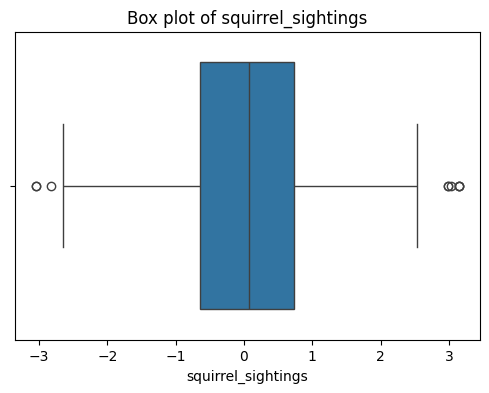

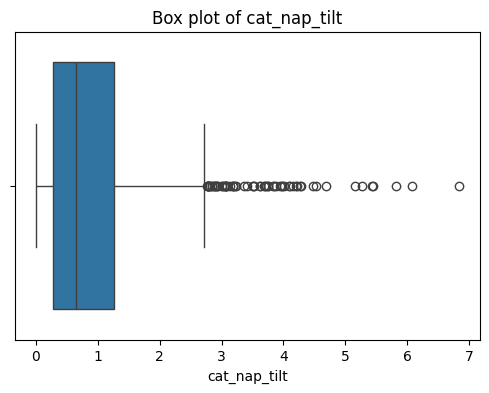

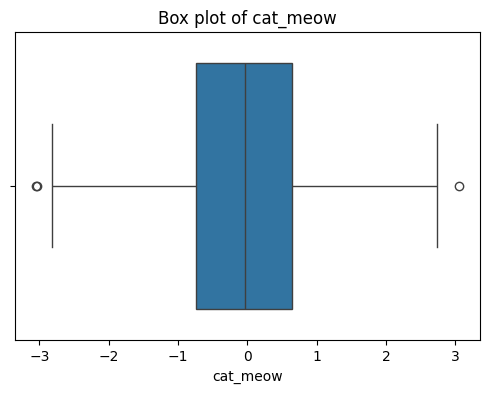

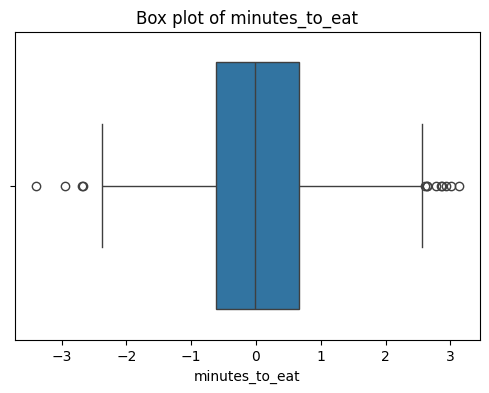

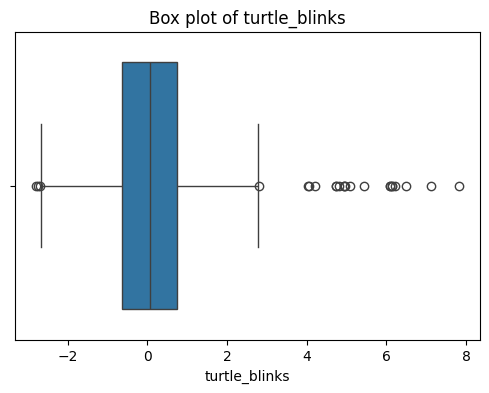

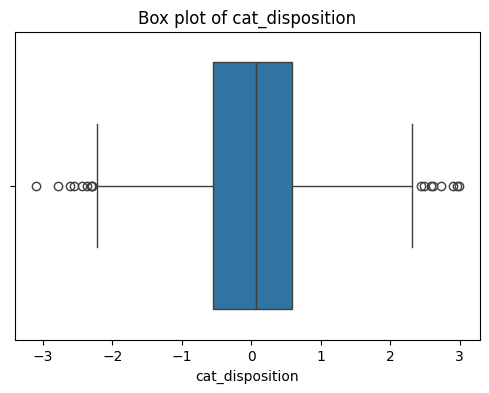

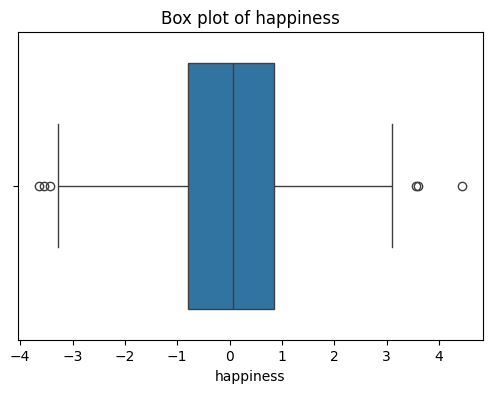

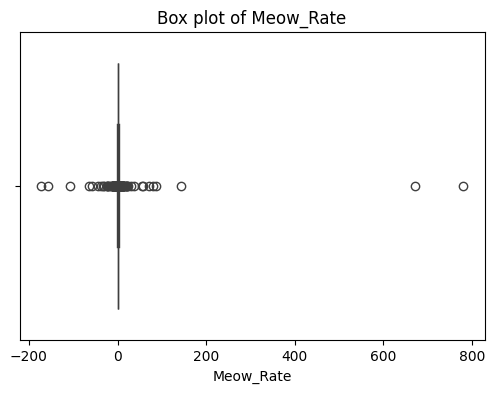

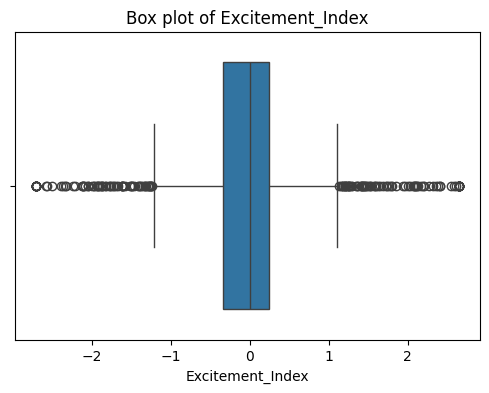

squirrel_sightings capped at -3.04 (low) and 3.14(high)
Excitement_Index capped at -2.66 (low) and 2.60(high)
cat_nap_tilt transformed with log1p to reduce right skew
turtle_blinks transformed with log1p to reduce right skew
Meow_Rate transformed with log1p to reduce right skew


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
from scipy import stats

for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = np.where(z_scores > 3)
    print(f"{col} has {len(outliers[0])} outliers")
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.show()
# Capping at +-3 standard deviations to reduce their influence on mean and variance
cap_cols = ['squirrel_sightings','Excitement_Index'] # Columns with >3 ouliers and not skewed
for col in cap_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    # Cap values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"{col} capped at {lower_bound:.2f} (low) and {upper_bound:.2f}(high)")
# Right-skew transformation reduces skewness and makes the distribution more symetric for modeling
log_cols = ['cat_nap_tilt','turtle_blinks','Meow_Rate'] # Columns with a right skew
for col in log_cols:
    df[col + '_Log'] = np.log1p(df[col])
    print(f"{col} transformed with log1p to reduce right skew")


6.  **Feature Scaling (15%):**
    * **Task:**
        * Apply appropriate scaling techniques to numerical features (e.g., standardization, min-max scaling).
        * Explain the rationale for choosing each scaling method.
        * Discuss the importance of scaling for different machine learning algorithms.
    * **Learning Objectives:**
        * Scale numerical features effectively.
        * Understand the differences between scaling methods.
        * Understand when scaling is necessary.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df[numerical_cols])

# I only used standardization because I already handled outliers

,squirrel_sightings,cat_nap_tilt,cat_meow,minutes_to_eat,turtle_blinks,cat_disposition,happiness,Meow_Rate,Excitement_Index
0,-0.137110,1.001347,-0.829993,0.411137,-1.556757,-0.981783,-0.562459,-0.118195,0.122242
1,0.099461,-0.094264,0.832391,0.495786,-0.732070,0.944046,0.017317,-0.016121,0.188133
2,-0.090691,1.314439,-0.016497,0.026336,-0.146880,0.047432,0.285178,-0.096804,0.031694
3,-1.387655,-0.627423,0.858929,0.810528,-0.454353,1.546500,-0.142001,-0.031960,-2.223525
4,-1.028681,-0.741082,-0.663765,-0.329935,0.011215,-0.601036,-1.000106,0.004247,0.624376
